In [31]:
#!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 262.6 kB/s eta 0:00:01
   ------------------------ --------------- 174.1/282.6 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.7 MB/s eta 0:00:00


In [97]:
#libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN

In [2]:
#load dataset
file_path = r"C:\Users\Hxtreme\Jupyter_Notebook_Learning\self_practice\Customer_Segmentation\Mall_Customers.csv"
df1 = pd.read_csv(file_path)
df1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df1.columns = df1.columns.str.replace(" ","_").str.lower()
df1.head()

,customerid,gender,age,annual_income_(k$),spending_score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Remove parentheses from column names
df1.columns = df1.columns.str.replace(r"[()]", "", regex=True)

In [5]:
df1.head()

,customerid,gender,age,annual_income_k$,spending_score_1-100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df1.columns = df1.columns.str.replace("-","to")
df1.head()

,customerid,gender,age,annual_income_k$,spending_score_1to100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customerid             200 non-null    int64 
 1   gender                 200 non-null    object
 2   age                    200 non-null    int64 
 3   annual_income_k$       200 non-null    int64 
 4   spending_score_1to100  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df1.columns = df1.columns.str.strip()

In [11]:
df1.isnull().sum()

customerid               0
gender                   0
age                      0
annual_income_k$         0
spending_score_1to100    0
dtype: int64

In [13]:
#duplicates
duplicates=df1[df1.duplicated()]
duplicates

,customerid,gender,age,annual_income_k$,spending_score_1to100


In [14]:
#drop cutomerid
cs_df = df1.drop("customerid", axis=1)

In [15]:
#EDA
numeric_df = cs_df.select_dtypes(include="number")
categorical_df = cs_df.select_dtypes(exclude="number")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


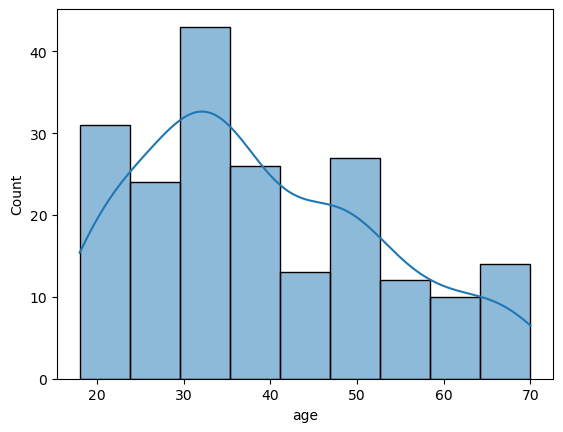

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


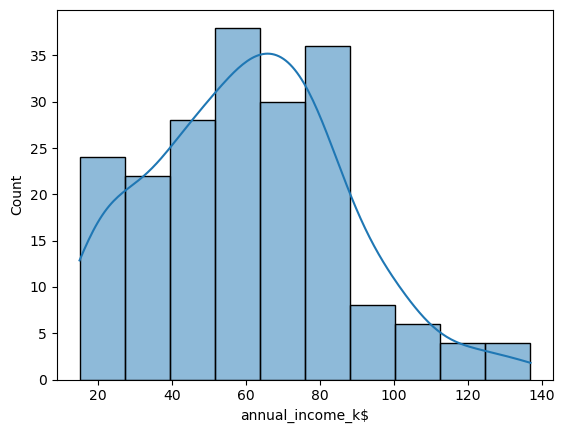

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


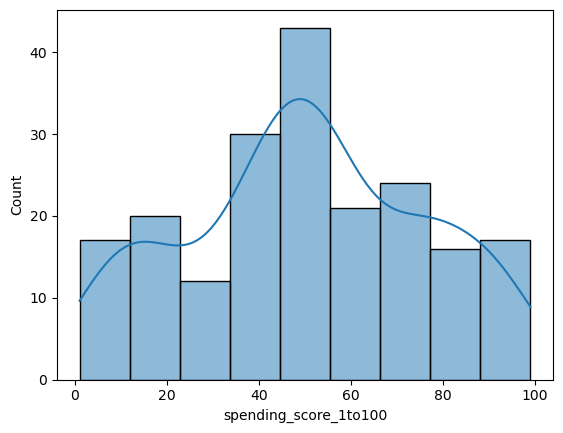

In [16]:
#univariate_numeric
numeric_col = numeric_df.columns 

for col in numeric_col: 
    sb.histplot(data=numeric_df,x=col,kde=True)
    plt.show()

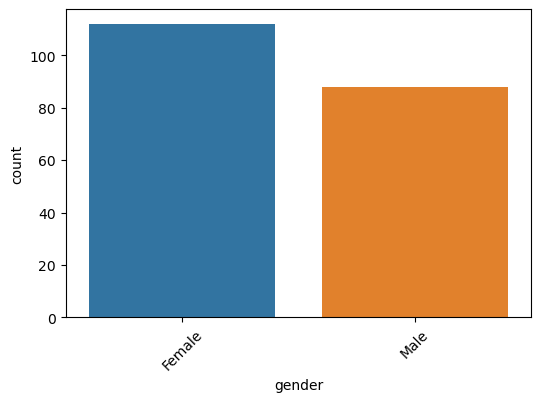

In [17]:
#univariate_categorical
categorical_col = categorical_df.columns 

for col in categorical_df: 
    plt.figure(figsize=(6, 4))
    sb.countplot(data=categorical_df, x=col, order=categorical_df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


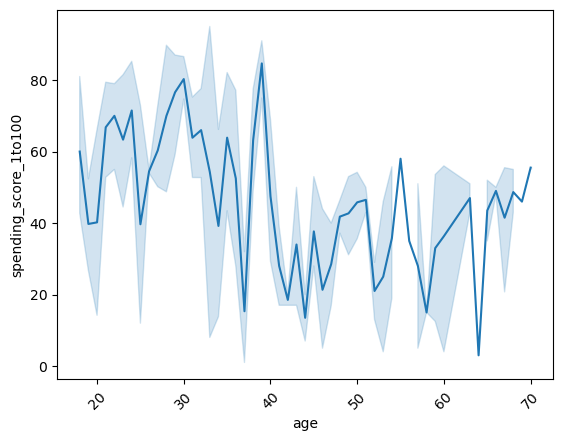

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


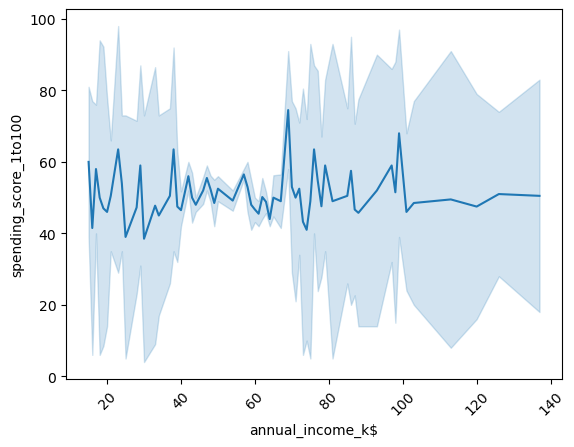

In [18]:
#bivariate
#numeric Vs numeric
cols = [
    "age","annual_income_k$"
]

for col in cols: 
    sb.lineplot(data=df1, x=col,y='spending_score_1to100')
    plt.xticks(rotation=45)
    plt.show()

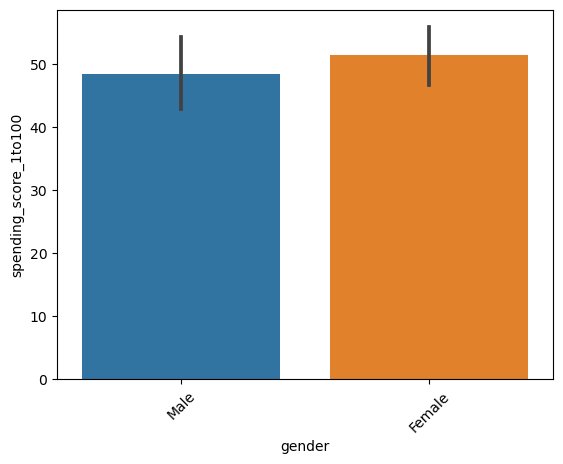

In [19]:
#categoric Vs numeric
cols = [
    "gender"
]

for col in cols: 
    sb.barplot(data=cs_df, x=col,y='spending_score_1to100')
    plt.xticks(rotation=45)
    plt.show()

In [24]:
#convert gender Male=0, Female=1
cs_df["gender"] = cs_df["gender"].replace({"Male": 0, "Female": 1})

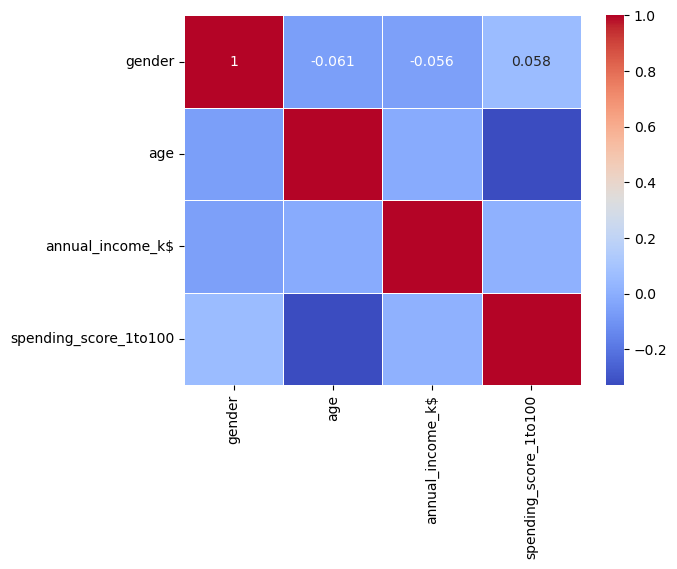

In [26]:
#multivariate
sb.heatmap(cs_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

<Axes: >

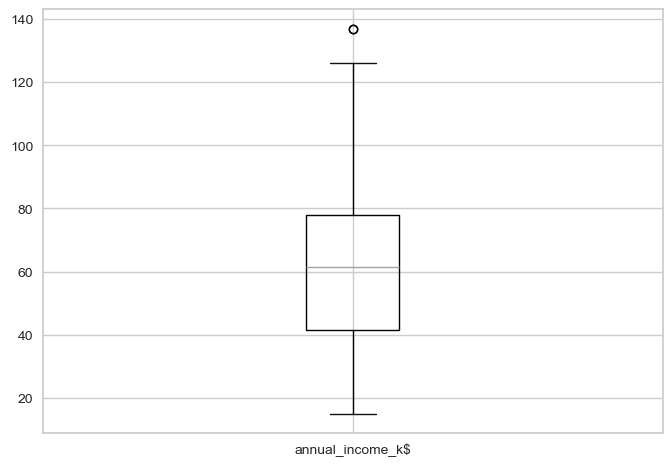

In [125]:
cs_df.boxplot(column='annual_income_k$')

In [126]:
import numpy as np

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = cs_df['annual_income_k$'].quantile(0.25)
Q3 = cs_df['annual_income_k$'].quantile(0.75)

# Compute Interquartile Range (IQR)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = cs_df[(cs_df['annual_income_k$'] < lower_bound) | (cs_df['annual_income_k$'] > upper_bound)]
print(f"Number of Outliers: {outliers.shape[0]}")


Number of Outliers: 2


In [127]:
cs_df = cs_df[(cs_df['annual_income_k$'] >= lower_bound) & (cs_df['annual_income_k$'] <= upper_bound)]

In [128]:
cs_df['annual_income_k$'] = np.where(cs_df['annual_income_k$'] > upper_bound, upper_bound,
                                     np.where(cs_df['annual_income_k$'] < lower_bound, lower_bound, cs_df['annual_income_k$']))

C:\Users\Hxtreme\AppData\Local\Temp\ipykernel_9504\2688913363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_df['annual_income_k$'] = np.where(cs_df['annual_income_k$'] > upper_bound, upper_bound,


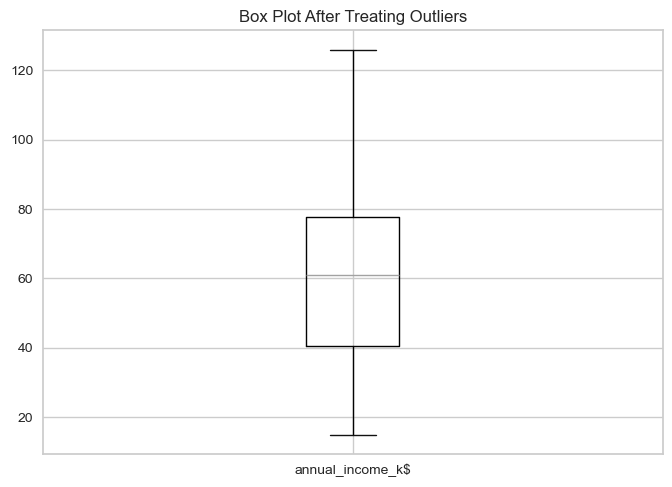

In [129]:
cs_df.boxplot(column='annual_income_k$')
plt.title("Box Plot After Treating Outliers")
plt.show()

In [130]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 198 non-null    int64  
 1   age                    198 non-null    int64  
 2   annual_income_k$       198 non-null    float64
 3   spending_score_1to100  198 non-null    int64  
 4   Cluster                198 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 9.3 KB


In [131]:
#data standardization
scaler=StandardScaler()

In [132]:
x_num = cs_df[['gender', 'age', 'annual_income_k$']]

In [133]:
scaler.fit(x_num)

StandardScaler()

In [134]:
std_x_num=scaler.transform(x_num)

C:\Users\Hxtreme\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


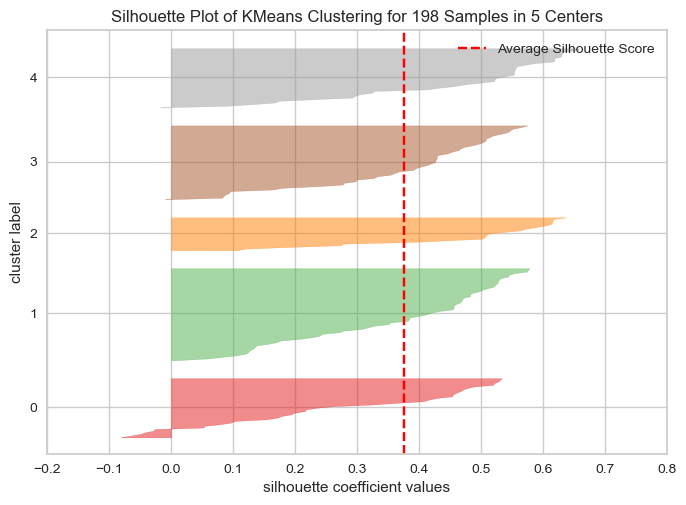

In [135]:
#KMEANS
km = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(std_x_num)
visualizer = SilhouetteVisualizer(km)
visualizer.fit(std_x_num)
visualizer.show()
plt.show()

In [136]:
km.labels_

array([2, 2, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 2, 2, 3, 2, 0, 3, 2, 2,
       3, 2, 3, 2, 3, 2, 3, 3, 0, 3, 0, 2, 3, 3, 3, 3, 3, 3, 0, 2, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 0, 2, 0, 3, 0, 2,
       3, 0, 2, 3, 0, 3, 0, 0, 0, 2, 3, 4, 3, 3, 0, 4, 0, 3, 3, 0, 0, 3,
       1, 1, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 4, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 4, 1, 1, 4, 1, 1, 4, 4, 0, 4, 4, 4,
       1, 1, 4, 1, 1, 4, 4, 1, 1, 4, 1, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1,
       1, 1, 4, 1, 4, 1, 1, 1, 4, 1, 4, 1, 4, 1, 1, 4, 4, 4, 4, 4, 1, 1,
       0, 4, 0, 4, 1, 1, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4])

In [137]:
km.predict([[1, 29,80000]])

array([4])

In [138]:
silhouette_score(x_num, km.fit_predict(std_x_num))
#0.40347363457407664 - before scaling
#-0.027438126139851204 - after scaling
#0.036646501086702525 - after  treating outliers

C:\Users\Hxtreme\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.036646501086702525

C:\Users\Hxtreme\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hxtreme\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hxtreme\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hxtreme\AppData\Roaming\Python\Python311\site-packages\sklearn\c

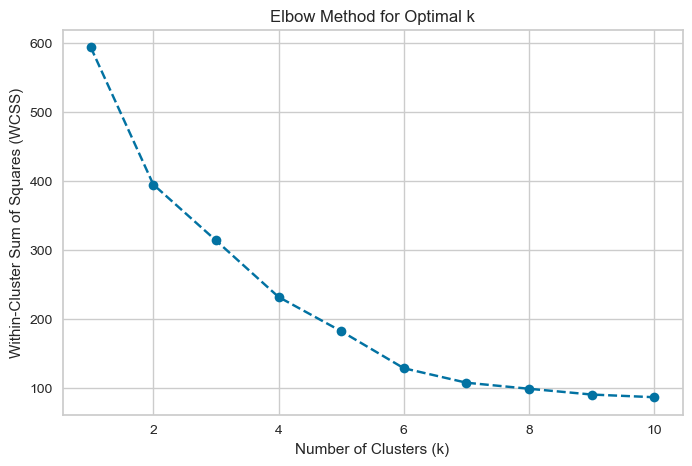

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the range of clusters to test
k_values = range(1, 11)
wcss = []  # Store WCSS for each k

# Compute KMeans for different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(std_x_num)  
    wcss.append(kmeans.inertia_) 

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()


In [140]:
#DBSCAN
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on trial
labels = dbscan.fit_predict(std_x_num)

In [141]:
# Add cluster labels to DataFrame
cs_df['Cluster'] = labels
labels

C:\Users\Hxtreme\AppData\Local\Temp\ipykernel_9504\1023971950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_df['Cluster'] = labels


array([ 0,  0,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  0,  0,  1,
        0, -1,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1, -1,  1, -1,  0,
        1,  1,  1,  1,  1,  1, -1, -1,  2,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  2,  1,  2,  1,  2,  1,  2,  2, -1,  3,  1,  2,  2,  1,  3,
        2,  1,  2,  1,  1,  1,  2,  2,  1, -1,  1,  1,  2, -1,  2,  1,  1,
        2,  1,  1,  1,  1,  3,  2,  2,  1,  1,  2,  1,  1,  2,  2,  1,  1,
        2,  2,  2,  1,  3,  2,  2,  2,  2,  1,  1,  2,  1,  1,  3,  1,  1,
        1,  2,  1,  1,  2,  1,  1,  2,  2,  2,  2,  2,  2,  1,  1,  2,  1,
        1,  2,  2,  1, -1,  2,  1,  1,  2,  2,  2,  1,  1,  2,  2,  2,  1,
        1,  1,  1,  2,  1,  2,  1, -1,  1,  2,  1,  2,  1,  2,  1,  1,  2,
        2,  2,  2,  2, -1,  1, -1,  2, -1,  2,  1,  1, -1,  1,  1,  2, -1,
        2,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1], dtype=int64)

In [142]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# New point to classify (make sure it's standardized)
new_point = np.array([[1, 29, 80000]])  
new_point_scaled = scaler.transform(new_point)  

# Find the nearest neighbor
neighbors = NearestNeighbors(n_neighbors=1).fit(std_x_num)
distance, index = neighbors.kneighbors(new_point_scaled)

# Get the cluster label of the nearest neighbor
predicted_cluster = cs_df.iloc[index[0][0]]["Cluster"]
print(f"Predicted Cluster: {predicted_cluster}")


Predicted Cluster: -1.0


C:\Users\Hxtreme\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


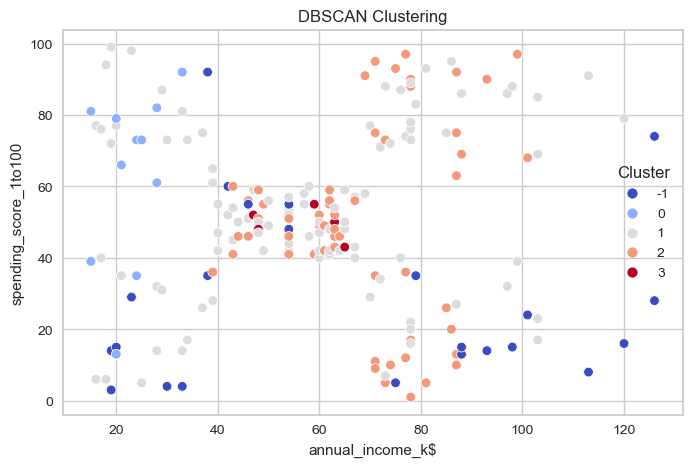

In [143]:

# Visualizing the clusters
plt.figure(figsize=(8, 5))
sb.scatterplot(x=cs_df['annual_income_k$'], y=cs_df['spending_score_1to100'], hue=cs_df['Cluster'], palette='coolwarm', legend='full')
plt.title("DBSCAN Clustering")
plt.show()

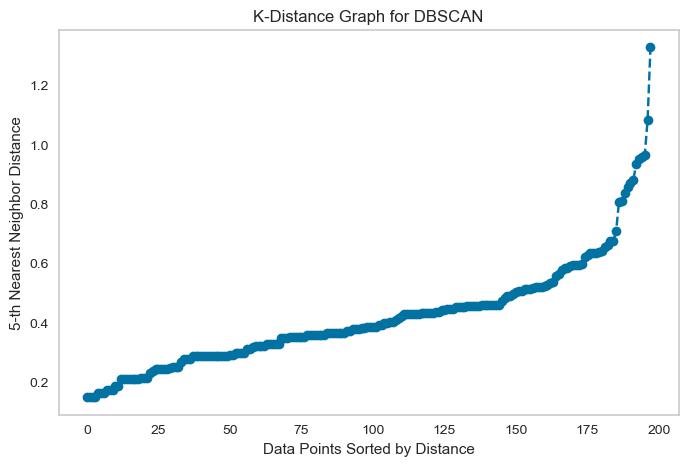

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Choose k = min_samples (usually 2 * number of features)
k = 5  

# Fit NearestNeighbors to the dataset
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(std_x_num)  # Ensure scaled_data is standardized
distances, indices = neigh.kneighbors(std_x_num)

# Sort distances of k-th nearest neighbor
k_distances = np.sort(distances[:, k - 1])

# Plot the K-Distance Graph
plt.figure(figsize=(8, 5))
plt.plot(k_distances, marker="o", linestyle="--", color="b")
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel(f"{k}-th Nearest Neighbor Distance")
plt.title("K-Distance Graph for DBSCAN")
plt.grid()
plt.show()
